## 母语人数

               Country        xm         r         x0
0        United States   50.0000  0.027982  22.722500
1                China  180.9516  0.017700  98.123500
2            Indonesia   40.0000  0.011370  14.749036
3               France   10.0000  0.005040   5.534078
4                India  400.0000  0.012990  69.678352
5             Pakistan   40.0000  0.018600   7.806814
6                Spain   10.0000  0.002480   3.749116
7             Tanzania   25.0000  0.030290   1.868316
8              Germany   15.0000  0.001910   7.828858
9          Philippines   60.0000  0.016570   4.739697
10            Thailand   60.0000  0.004670   4.738532
11  Russian Federation   20.0000  0.001200  13.901000
12          Bangladesh   50.0000  0.011340   8.147086


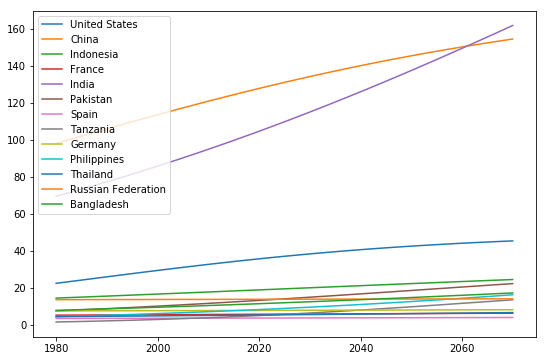

In [253]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

file = open("E:/Zeng Siwei/大学/数学建模/2018/B题/使用数据/母语人数计算.csv")
data = pd.read_csv(file)
n_features = data["Country"].count()
n_year = 91

print(data)

x_native = np.linspace(1980, 2070,n_year)#线性插值
y_native = np.zeros((n_year))
coef_xm = np.array(data["xm"])
coef_r = np.array(data["r"])
x0 = np.array(data["x0"])

plt.figure(figsize=(9,6))
for j in range(n_features):
    for i in range(n_year):
        y_native[i] = coef_xm[j]/(1+(coef_xm[j] / x0[j] -1)*np.exp(-coef_r[j]* (x_native[i]-1980)))
#     print(y_native)
    plt.plot(x_native, y_native, label = data["Country"][j])
plt.legend(loc = 2)
plt.show()


## 第二语言

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

file = open("E:/Zeng Siwei/大学/数学建模/2018/B题/使用数据/second language rrefine.csv")
data = pd.read_csv(file)
data_2000 = np.array(data['2000'])
n_features = data["Language"].count()
n_samples = 3 #如何统计列数呢 18 3

clf = linear_model.LinearRegression(fit_intercept=False)
p = np.zeros((n_features, n_features))
s = np.zeros((n_samples+1))
# string = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", 
#           "2012", "2013", "2014", "2015", "2016", "2017"]
string = ["2014", "2015", "2016", "2017"]
for i in range(n_samples+1):
    for j in range(n_features):
        s[i] += data[string[i]][j]

x_train = np.zeros((n_samples, n_features))
y_train = np.zeros((n_features, n_samples))
x_data = np.zeros((n_samples, n_features))
y_data = np.zeros((n_features, n_samples))

## x_train为 #samples * #features
## y_train为 #n_features * #samples
## #samples = 3, #feaures = 13


for i in range(n_samples):
    x_data[i] = np.array(data[string[i]])
# x_data为 #samples * #features
# x_data在遍历j时都不变
for j in range(n_features):
    for i in range(n_samples):
        y_data[j][i] = np.array(data[string[i+1]][j])
# y_data为 #n_features * #n_samples
# y_data对于每个j的每个样本都对应不同的值

# print(data["Country"][0])
# print(x_data)
# print(y_data)

### 计算概率转移矩阵

In [3]:
# for j in range(n_features):
#     clf.fit(x_data, y_data[j])
#     p[j] = clf.coef_
# print(p)

# # 做一个移项
# for j in range(n_features):
#     for i in range(n_samples):
#         y_train[j][i] = y_data[j][i] - x_data[i][j]
#         for k in range(n_features):
#             if k != j:
#                 x_train[i][k] = x_data[i][k] - x_data[i][j]
#             else:
#                 x_train[i][k] = 0
# #     print(x_train)
# #     print("==============================")
#     clf.fit(x_train, y_train[j])
#     p[j] = clf.coef_
#     p[j][j] = 1 - np.sum(p[j])

In [4]:
Y1 = np.zeros((n_samples, n_features))
Y2 = np.zeros((n_samples, n_features))
for i in range(n_samples):
    Y2[i] = np.array(data[string[i+1]])
    Y1[i] = np.array(data[string[i]])
# print(Y1)
p = np.dot(np.dot(np.linalg.inv(np.dot(Y1.T, Y1)), Y1.T), Y2)


In [5]:
p = p / 10
# print(p)
st = np.array(data["2014"])
print(np.dot(st, p))


[  6.00864757e+08   1.93476979e+08   1.74723784e+08   1.53235287e+08
   1.20286905e+08   9.38862413e+07   9.11834787e+07   8.21576276e+07
   5.25956878e+07   4.49736837e+07   3.99077049e+07   4.18397753e+07
   1.91720754e+07]


### 第二语言使用人数走势图

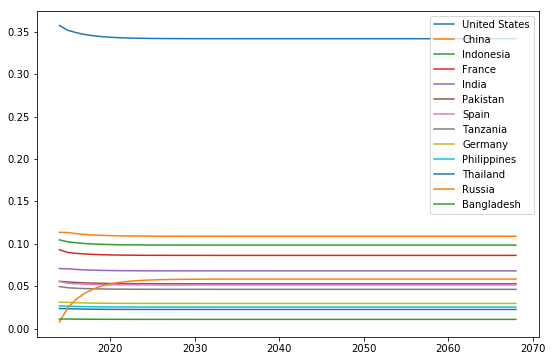

In [6]:
iterate = 54
st = np.zeros((iterate+1, n_features))
st[0] = np.array(data["2014"])
# print(data)
for i in range(iterate):
    st[i+1] = np.dot(st[i], p)

for i in range(iterate+1):
    st[i] /= np.sum(st[i])

x = range(2014, 2014+iterate+1)
plt.figure(figsize=(9,6))

for j in range(n_features):
    plt.plot(x, st.T[j], label = data["Country"][j])
plt.legend(loc = 0)
plt.show()

### 总人数走势图

[ 29.65661054  29.99334813  30.32820909  30.6610791   30.99184675
  31.32040367  31.64664463  31.97046771  32.29177435  32.61046949
  32.92646161  33.23966286  33.54998908  33.85735988  34.16169871
  34.46293283  34.76099342  35.05581554  35.34733817  35.63550419
  35.9202604   36.20155747  36.47934996  36.75359624  37.02425849
  37.29130265  37.55469833  37.81441881  38.07044093  38.32274504
  38.57131495  38.81613778  39.05720397  39.29450711  39.52804391
  39.75781408  39.98382024  40.20606782  40.42456497  40.63932246
  40.85035355  41.05767392  41.26130158  41.46125671  41.65756161
  41.85024057  42.03931979  42.22482726  42.40679266  42.58524726
  42.76022387  42.93175665  43.09988111  43.26463396  43.42605305
  43.58417727  43.73904645  43.89070131  44.03918336  44.18453481
  44.32679853  44.46601794  44.60223695  44.73549991  44.86585152
  44.99333677  45.11800092  45.23988937  45.35904767  45.47552144
  45.58935632]
[  7.68368845  10.99217811  10.91047495  10.83532754  10.7705

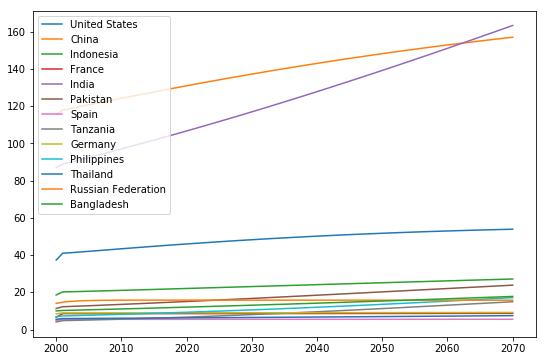

In [280]:
iterate = 70
st = np.zeros((iterate+1, n_features))
st[0] = data_2000 / (10**8)
for i in range(iterate):
    st[i+1] = np.dot(st[i], p)

x_native = np.linspace(2000, 2070,n_year)#线性插值
y_native = np.zeros((n_year))
coef_xm = np.array(data["xm"])
coef_r = np.array(data["r"])
x0 = np.array(data["x0"])

    
file = open("E:/Zeng Siwei/大学/数学建模/2018/B题/使用数据/母语人数计算.csv")
data = pd.read_csv(file)
n_features = data["Country"].count()
n_year = 71

x_native = np.linspace(2000, 2070,n_year)#线性插值
y_tot = np.zeros((n_year))
coef_xm = np.array(data["xm"])
coef_r = np.array(data["r"])
x0 = np.array(data["x0"])

plt.figure(figsize=(9,6))
for j in range(n_features):
    for i in range(n_year):
        y_tot[i] = coef_xm[j]/(1+(coef_xm[j] / x0[j] -1)*np.exp(-coef_r[j]* (x_native[i]-1980)))
    print(y_tot)
    y_tot += st.T[j]
    print("==========================================")
    print(st.T[j])
    plt.plot(x_native, y_tot, label = data["Country"][j])
plt.legend(loc = 2)
plt.show()

### 2068年的语言分布

In [44]:
dis = p
for i in range(54):
    dis = np.dot(dis, p)
# for i in range(n_features):
i = 12
for j in range(n_features):
    print("{name:'%s', value: %d}," %(data["Country"][j], abs(dis[j][i] * 10**5)))


{name:'United States', value: 5252},
{name:'China', value: 4871},
{name:'Indonesia', value: 7107},
{name:'France', value: 2085},
{name:'India', value: 6588},
{name:'Pakistan', value: 5083},
{name:'Spain', value: 1441},
{name:'Tanzania', value: 4418},
{name:'Germany', value: 5143},
{name:'Philippines', value: 9857},
{name:'Thailand', value: 5087},
{name:'Russia', value: 158},
{name:'Bangladesh', value: 15658},


### 置信度检验

In [106]:
y_avg = np.zeros((n_features, 1))
for j in range(n_features):
    y_avg[j][0] = np.average(y_data[j])
# print(y_avg)


print(x_data.shape)
print(p.shape)
y_hat = np.dot(x_data, p).T
print(y_hat.shape)
print(y_hat)
# y_hat[j]对应对第j个方程的预测
# y_hat[j][i]对应第j个方程对i+1年的预测

ssr = np.zeros((n_features, 1))
for j in range(n_features):
    for i in range(n_samples):
        ssr[j] = ssr[j] + np.square(y_hat[j][i]-y_avg[j][0])

sse = np.zeros((n_features, 1))
for j in range(n_features):
    for i in range(n_samples):
        sse[j] = np.square(y_hat[j][i]-y_data[j][i])
    
f = np.zeros((n_features, 1))
for j in range(n_features):
    f[j] = ssr[j] / n_features / sse[j] * (16 - 1 - n_features)
    print(f[j])

(3, 13)
(13, 13)
(13, 3)
[[ 0.35769917  0.34930744  0.35259707]
 [ 0.11517825  0.11236465  0.1132601 ]
 [ 0.10401434  0.10146678  0.10228741]
 [ 0.09122208  0.08896456  0.08968468]
 [ 0.07160767  0.06987043  0.07047178]
 [ 0.05589116  0.05451804  0.05495249]
 [ 0.05428219  0.05294756  0.0533695 ]
 [ 0.04890903  0.04771046  0.04809067]
 [ 0.0313106   0.03054358  0.03078699]
 [ 0.02677316  0.02611022  0.02631828]
 [ 0.02375735  0.02317821  0.02336292]
 [ 0.02490752  0.02479739  0.03007221]
 [ 0.01141328  0.01113295  0.01122184]]
[ 0.07284327]
[ 0.0471928]
[ 0.04808057]
[ 0.04729684]
[ 0.05459278]
[ 0.04674206]
[ 0.04668146]
[ 0.04693989]
[ 0.04696948]
[ 0.04613516]
[ 0.04736065]
[ 0.00942792]
[ 0.04690205]


# 模糊数学模型


In [21]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

file = open("E:/Zeng Siwei/大学/数学建模/2018/B题/使用数据/模糊数学计算 refine.csv")
data = pd.read_csv(file)
n_samples = data["Country"].count()
n_features = 4
string = ["GROWTH", "AVG", "CSP", "FF"]
print(data)

               Country    GROWTH       AVG       CSP        FF
0        United States  0.205491  1.000000  1.000000  1.000000
1                China  0.197583  0.681648  0.165207  0.103041
2            Indonesia  0.000000  0.442457  0.066413  0.004679
3               France  1.000000  1.000000  0.351892  0.543759
4                India  0.222710  0.192865  0.426896  0.343396
5             Pakistan  0.065537  0.142689  0.023294  0.001936
6                Spain  0.000000  1.000000  0.258549  0.384276
7             Tanzania  0.000000  0.098813  0.089542  0.000000
8              Germany  0.113426  1.000000  0.262019  0.511654
9          Philippines  0.025128  0.302386  0.043119  0.003493
10            Thailand  0.067168  0.696973  0.096811  0.041943
11  Russian Federation  1.000000  1.000000  0.150339  0.394887
12          Bangladesh  0.187528  0.109653  0.049067  0.000660


In [22]:
r = np.zeros((n_features, n_samples))
for i in range(n_features):
    r[i] = data[string[i]]
print(r)

[[  2.05490712e-01   1.97582679e-01   0.00000000e+00   1.00000000e+00
    2.22710471e-01   6.55368340e-02   0.00000000e+00   0.00000000e+00
    1.13426026e-01   2.51284410e-02   6.71680260e-02   1.00000000e+00
    1.87528009e-01]
 [  1.00000000e+00   6.81647507e-01   4.42456969e-01   1.00000000e+00
    1.92864576e-01   1.42689165e-01   1.00000000e+00   9.88131510e-02
    1.00000000e+00   3.02385855e-01   6.96972848e-01   1.00000000e+00
    1.09653062e-01]
 [  1.00000000e+00   1.65207335e-01   6.64133490e-02   3.51891624e-01
    4.26895754e-01   2.32942340e-02   2.58549480e-01   8.95423760e-02
    2.62018834e-01   4.31191140e-02   9.68114980e-02   1.50338675e-01
    4.90665790e-02]
 [  1.00000000e+00   1.03041000e-01   4.67856000e-03   5.43758760e-01
    3.43396000e-01   1.93600000e-03   3.84276010e-01   0.00000000e+00
    5.11654090e-01   3.49281000e-03   4.19430400e-02   3.94886560e-01
    6.60490000e-04]]


## 方法一
### 评价矩阵

In [23]:
n = 4
mat_origin = [1, 1/7, 1/3 , 3, 7, 1, 3, 5, 3, 1/3, 1, 3, 1/3, 1/5, 1/3, 1]
mat_judge = np.array(mat_origin).reshape(4, 4)
print(mat_judge)

[[ 1.          0.14285714  0.33333333  3.        ]
 [ 7.          1.          3.          5.        ]
 [ 3.          0.33333333  1.          3.        ]
 [ 0.33333333  0.2         0.33333333  1.        ]]


### 计算权重

In [24]:
eig1, eig2 = np.linalg.eig(mat_judge)
print("eig is :")
print(eig1)
print("eig matrix is :")
print(eig2)

sum_num = 0
mat_weight = np.zeros((n))
for i in range(n):
    mat_weight[i] = eig2[i][0]
print(mat_weight)
mat_weight = mat_weight / np.sum(mat_weight)
print(mat_weight)

eig is :
[ 4.23698742+0.j        -0.08629993+0.9927496j -0.08629993-0.9927496j
 -0.06438756+0.j       ]
eig matrix is :
[[ 0.18178987+0.j          0.20770852-0.14498099j  0.20770852+0.14498099j
  -0.12563690+0.j        ]
 [ 0.90578694+0.j         -0.90705141+0.j         -0.90705141-0.j
  -0.82664708+0.j        ]
 [ 0.36589206+0.j         -0.22435410-0.2011774j  -0.22435410+0.2011774j
   0.54803175+0.j        ]
 [ 0.11236313+0.j          0.04088652+0.14358484j  0.04088652-0.14358484j
   0.02304718+0.j        ]]
[ 0.18178987  0.90578694  0.36589206  0.11236313]
[ 0.11609794  0.57847007  0.23367261  0.07175938]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [25]:
res = np.dot(mat_weight, r)
print(res)

[ 0.90775911  0.46325021  0.27180282  0.81581523  0.26181834  0.09573225
  0.66646141  0.07808405  0.6895812   0.18816492  0.436608    0.75803485
  0.09671554]


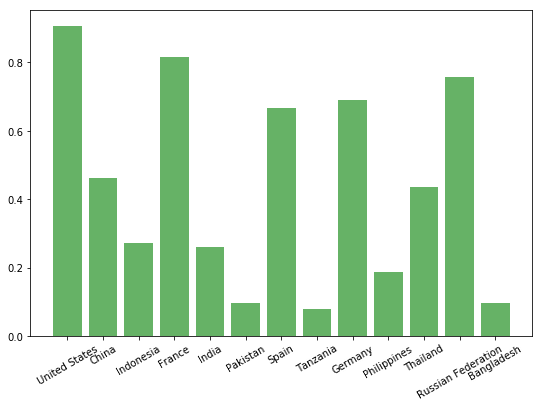

In [37]:
plt.figure(figsize=(9,6))
x=range(0, 13)
plt.bar(x, res, color="green", alpha = 0.6)
plt.xticks(x,data["Country"],rotation=30)
plt.show()

### 一致性检验

In [219]:
ci = (eig1[0] - n) / (n - 1)
print(ci)
cr = ci / 0.9
print("cr is:")
print(cr)

(0.0789958075333+0j)
cr is:
(0.0877731194814+0j)


## 方法二
### 计算权重

In [96]:
n = 4
s = np.zeros((n))
for i in range(n):# row
    for j in range(n):
        s[j] = s[j] + mat_judge[i][j]
print(s)

for i in range(n):
    for j in range(n):
        mat_judge[i][j] = mat_judge[i][j] / s[j]
print(mat_judge)

[ 11.33333333   1.67619048   4.66666667  12.        ]
[[ 0.08823529  0.08522727  0.07142857  0.25      ]
 [ 0.61764706  0.59659091  0.64285714  0.41666667]
 [ 0.26470588  0.19886364  0.21428571  0.25      ]
 [ 0.02941176  0.11931818  0.07142857  0.08333333]]


In [97]:
mat_weight = np.zeros((n))
for i in range(n):
    mat_weight[i] = np.sum(mat_judge[i])
mat_weight /= np.sum(mat_weight)
print(mat_weight)

[ 0.12372278  0.56844044  0.23196381  0.07587296]


## 检验一致性